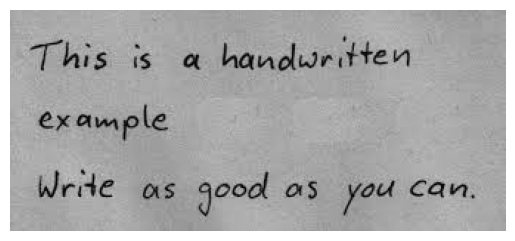

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Extracted Text:
This
handuJr #ten
ex
ample
Write
as
as
You can_
Jood


In [5]:
# OCR Task: Extract text from an image using EasyOCR
import easyocr
from PIL import Image
import matplotlib.pyplot as plt

# Ask user for image path
image_path = input('Enter the path to the image: ')

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR
results = reader.readtext(image_path)

# Display extracted text
print('Extracted Text:')
for (bbox, text, prob) in results:
    print(text)

In [9]:
# OCR Task: Extract text from local or internet image
import easyocr
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import os
import numpy as np

# Function to load image from local path or URL, supporting common formats
def load_image(path):
    try:
        if path.startswith('http://') or path.startswith('https://'):
            response = requests.get(path)
            response.raise_for_status()
            img = Image.open(BytesIO(response.content))
            img = img.convert('RGB')  # Ensure compatibility for OCR
        elif path.startswith('drive://') or 'drive.google.com' in path:
            # For Google Drive links, convert to direct download
            if 'drive.google.com' in path:
                if '/file/d/' in path:
                    file_id = path.split('/file/d/')[1].split('/')[0]
                    direct_url = f'https://drive.google.com/uc?export=download&id={file_id}'
                    response = requests.get(direct_url)
                    response.raise_for_status()
                    img = Image.open(BytesIO(response.content))
                    img = img.convert('RGB')
                else:
                    raise ValueError('Invalid Google Drive file link format.')
            else:
                raise ValueError('Invalid Google Drive path.')
        else:
            if not os.path.exists(path):
                raise FileNotFoundError(f'File not found: {path}')
            img = Image.open(path)
            img = img.convert('RGB')
        return img
    except UnidentifiedImageError:
        raise ValueError('Cannot identify image file. Please check the file format and ensure it is a valid image (jpeg, png, etc).')
    except Exception as e:
        raise ValueError(f'Error loading image: {e}')

# Function to perform OCR
def extract_text(img):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(np.array(img))
    return '\n'.join([text for _, text, _ in result])

# User input for image path
img_path = input('Enter image path (local, Google Drive, or URL): ')
try:
    img = load_image(img_path)
    display(img)
    text = extract_text(img)
    print('Extracted Text:')
    print(text)
except Exception as e:
    print(f'Error: {e}')

Error: Cannot identify image file. Please check the file format and ensure it is a valid image (jpeg, png, etc).
